In [88]:
# Basics
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Model selection
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyRegressor

# Modelling
from sklearn.linear_model import LinearRegression

In [89]:
data = pd.read_csv("data/train.csv", index_col="Id")
display(data.describe())
display(data.head())

print("\nShape", data.shape)
print("\n Dtypes")
display(data.dtypes.value_counts())
print("\nDuplicates", data.duplicated().sum())
print("\nNulls")
display(data.isnull().sum().sort_values(ascending=False).head(20))

print("Columns:", data.columns)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Shape (1460, 80)

 Dtypes


object     43
int64      34
float64     3
dtype: int64


Duplicates 0

Nulls


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

Columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDr

### Split into X and y

In [90]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

print(X.shape, y.shape)

(1460, 79) (1460,)


## Initial data analysis

#### Check for duplicates

In [91]:
print("Train", data.duplicated().sum())

if data.duplicated().sum() == 0:
    print("Neither train nor test data contain duplicate value.")

Train 0
Neither train nor test data contain duplicate value.


#### Split into numerical/categorical

In [92]:
print(data.dtypes.value_counts())

X_cat = X.select_dtypes("object")
X_num = X.select_dtypes("number")

print(X_cat.shape)
print(X_num.shape)

object     43
int64      34
float64     3
dtype: int64
(1460, 43)
(1460, 36)


### Handle empty values 

#### Numerical

In [93]:
missing_mum = pd.DataFrame(X_num.isnull().sum().sort_values(ascending=False))
missing_mum.loc[missing_mum[0] > 0]

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [94]:
# Let's impute these
simple_imputer = SimpleImputer().set_output(transform="pandas")
X_num = simple_imputer.fit_transform(X_num)

In [95]:
X_num.isnull().sum().sort_values(ascending=False).head(5)


MSSubClass      0
LotFrontage     0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [96]:
X_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


#### Categorical

In [97]:
unique_cat = pd.DataFrame(X_cat.nunique()).rename(columns={0:"unique"}).sort_index()
missing_cat = pd.DataFrame(X_cat.isnull().sum()).rename(columns={0:"missing"}).sort_index()
pd.concat(objs=[unique_cat, missing_cat], axis=1).sort_values("unique").head(10)


,unique,missing
Alley,2,1369
Street,2,0
CentralAir,2,0
Utilities,2,0
LandSlope,3,0
PavedDrive,3,0
PoolQC,3,1453
GarageFinish,3,81
BsmtQual,4,37
BsmtExposure,4,38


In [98]:
#for col in X_cat.columns:
    #X_cat[col].value_counts().plot(kind="bar", figsize=(3,3))
    #plt.show()

In [99]:
cat_selection = ["KitchenQual", "BsmtFinType1", "HeatingQC", "GarageFinish"]
X_cat_sel = X_cat[cat_selection]
X_cat_sel.head(1)

,KitchenQual,BsmtFinType1,HeatingQC,GarageFinish
Id,,,,
1,Gd,GLQ,Ex,RFn


In [100]:
X_cat_sel["KitchenQual"].value_counts(dropna=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [101]:
X_cat_sel["BsmtFinType1"].value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [102]:
X_cat_sel["BsmtFinType1"] = X_cat_sel["BsmtFinType1"].fillna("NoBasement")
X_cat_sel["BsmtFinType1"].value_counts(dropna=False)

/tmp/ipykernel_11127/3736215095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_sel["BsmtFinType1"] = X_cat_sel["BsmtFinType1"].fillna("NoBasement")


Unf           430
GLQ           418
ALQ           220
BLQ           148
Rec           133
LwQ            74
NoBasement     37
Name: BsmtFinType1, dtype: int64

In [103]:
X_cat_sel["HeatingQC"].value_counts(dropna=False)

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [104]:
X_cat_sel["GarageFinish"].value_counts(dropna=False)
X_cat_sel["GarageFinish"] = X_cat_sel["GarageFinish"].fillna("NoGarage")
X_cat_sel["GarageFinish"].value_counts(dropna=False)

/tmp/ipykernel_11127/930851644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_sel["GarageFinish"] = X_cat_sel["GarageFinish"].fillna("NoGarage")


Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

### Encode

In [105]:
X_cat_sel.head(2)

,KitchenQual,BsmtFinType1,HeatingQC,GarageFinish
Id,,,,
1,Gd,GLQ,Ex,RFn
2,TA,ALQ,Ex,RFn


In [106]:
ohe = OneHotEncoder(sparse_output=False, drop="if_binary").set_output(transform="pandas")
ohe.fit(X_cat_sel)
X_cat_sel_encoded = ohe.transform(X_cat_sel)
X_cat_sel_encoded.head(1)


,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Numeric

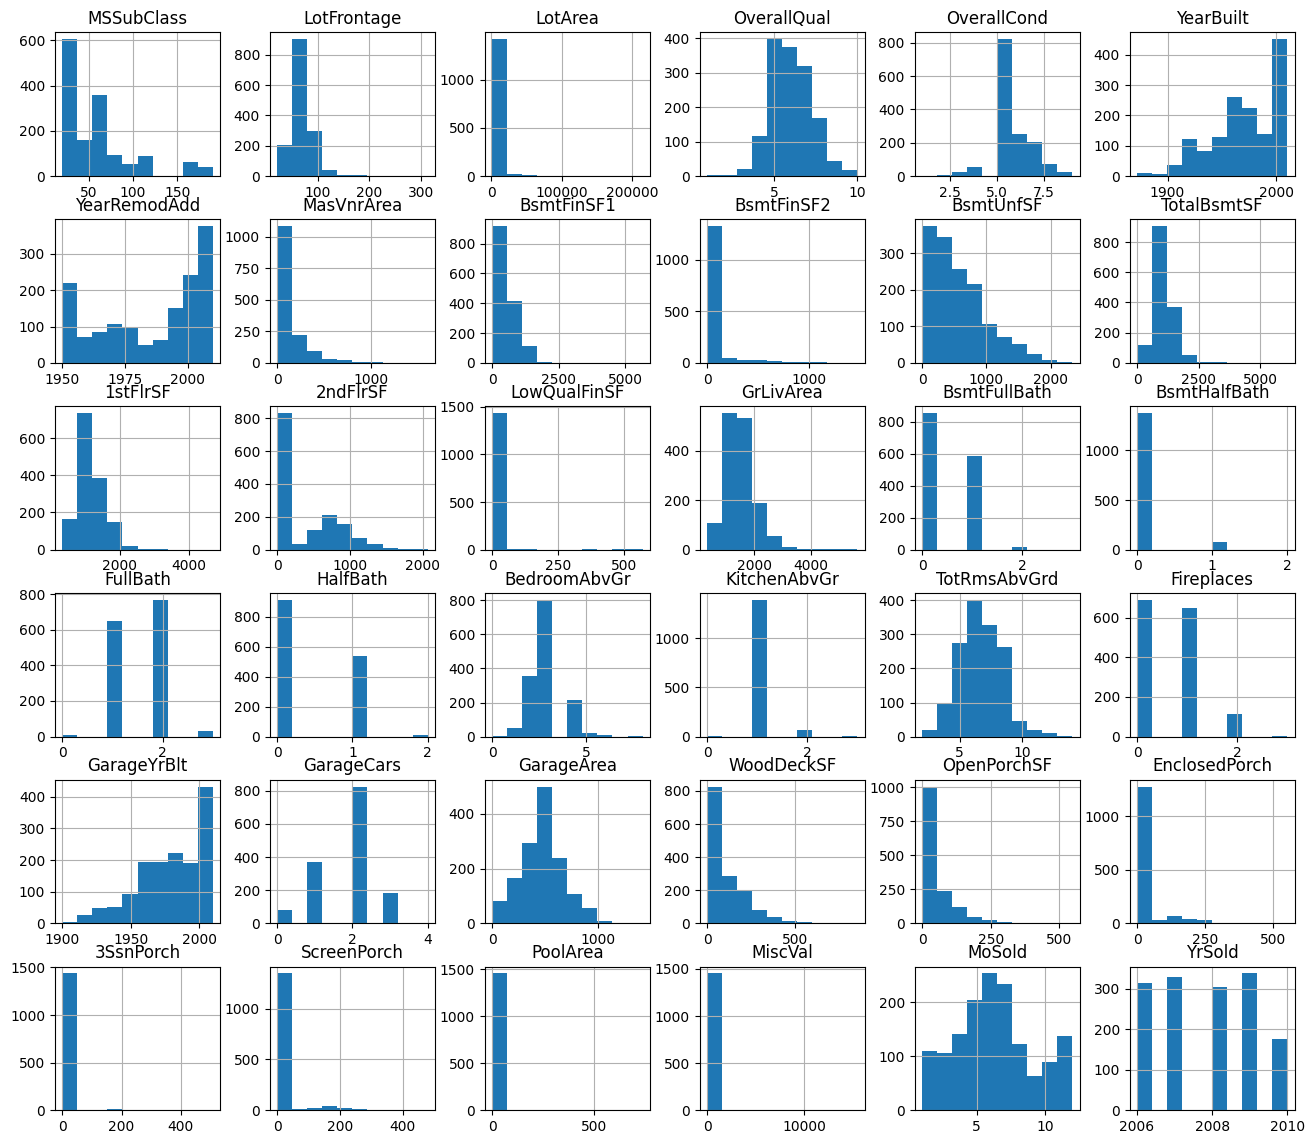

In [107]:
X_num.hist(figsize=(16,14));

In [108]:
X_num.corr().abs().unstack().sort_values().drop_duplicates().sort_values(ascending=False).head(10)

MSSubClass    MSSubClass      1.000000
GarageCars    GarageArea      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
GarageYrBlt   YearBuilt       0.780555
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
GrLivArea     FullBath        0.630012
GarageYrBlt   YearRemodAdd    0.618130
dtype: float64

#### Scaling
Let's use minmax for now.

In [109]:
min_max_scaler = MinMaxScaler().set_output(transform="pandas")
min_max_scaler.fit(X_num)

X_num_scaled = min_max_scaler.transform(X_num)

X_num_scaled.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.150685,0.03342,0.666667,0.5,0.949275,0.883333,0.1225,0.125089,0.0,...,0.38646,0.0,0.111517,0.0,0.0,0.0,0.0,0.0,0.090909,0.5


### Combine numerical and categorical

In [110]:
X_preprocessed = pd.concat([X_num_scaled, X_cat_sel_encoded], axis = 1)
print(X_preprocessed.shape)
print(X_preprocessed.columns)

X_preprocessed.head(1)

(1460, 56)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'KitchenQual_Ex', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'BsmtFinType1_ALQ',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_NoBasement', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'GarageFinish_Fin', 'GarageFinish_NoGarage',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.150685,0.03342,0.666667,0.5,0.949275,0.883333,0.1225,0.125089,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Create baseline model

First baseline model score, all unscaled num columns, no cat: 0.787016404148589

First baseline model score, all scaled num columns, no cat: 0.7870400397394002

In [111]:
baseline = LinearRegression()

In [112]:
cv_simple_num = cross_validate(estimator=baseline, X=X_preprocessed, y=y)

In [113]:
print(cv_simple_num)
print("Mean score", cv_simple_num["test_score"].mean())

{'fit_time': array([0.06009722, 0.07550097, 0.15482831, 0.14942622, 0.13792992]), 'score_time': array([0.0297401 , 0.03438115, 0.07978296, 0.01693368, 0.0083127 ]), 'test_score': array([ 8.70810365e-01, -1.19053695e+21,  8.41034569e-01,  8.38267100e-01,
        6.38139631e-01])}
Mean score -2.3810739074403277e+20
